In [1]:
import heeps
from heeps.util.img_processing import crop_img
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

In [2]:
def get_psfs(conf, case='scao_only', modes=['APPIMG', 'APPLMS'], verbose=True):#'RAVC', 'APPIMG', 'CVC', 'CLC']):
    conf.update(
        mode = 'ELT',
        f_phase = 'wavefront/cfull/cube_Cfull_20220512_3600s_300ms_0piston_meters_%s'%case + '_L_285.fits',
        apo_drift = 0.02, # (% ptv)
        f_amp = 'wavefront/cbw/20221006/talbot/LM_rep_6_-0h30.fits',
        avg = True,
        hfov = 1.065,
        ngrid = 2048,
    )
    conf = heeps.config.read_config(**conf)
    conf['band_specs']['L']['pscale'] = 5.47/2
    conf = heeps.config.update_config(**conf)
    wf = heeps.pupil.pupil(**conf, savefits=True)
    psf = heeps.wavefront.propagate(wf, **conf)
    elt_peak = np.max(psf)
    print('ELT peak = %.4f'%elt_peak)
    #psf /= elt_peak
    fits.writeto(conf['dir_output'] + 'onaxis_PSF_L_ELT.fits', psf, overwrite=True)
    
    for conf['mode'] in modes:
        if 'RAVC' in conf['mode']:
            conf.update(ls_dRext=0.0477, ls_dRint=0.04, ls_dRspi=0.0249)
        elif 'CVC' in conf['mode']:
            conf.update(ls_dRext=0.0209, ls_dRint=0.09, ls_dRspi=0.0245)
        elif 'CLC' in conf['mode']:
            conf.update(ls_dRext=0.1095, ls_dRint=0.0491, ls_dRspi=0.0317)
        elif 'APPIMG' in conf['mode']:
            conf.update(f_app_amp='optics/app/METIS_IMG_aper_rot.fits',
                        f_app_phase='optics/app/METIS_IMG_gvAPP_final_rot.fits')
        elif 'APPLMS' in conf['mode']:
            conf.update(f_app_amp='optics/app/METIS_LMS_aper.fits',
                        f_app_phase='optics/app/METIS_LMS_gvAPP_final.fits')
        conf = heeps.config.read_config(**conf)
        conf = heeps.config.update_config(**conf, verbose=verbose)
        wf = heeps.pupil.pupil(**conf)
        if 'VC' in conf['mode']:
            psf_OFF = heeps.wavefront.propagate(wf, onaxis=False, **conf)
            psf_ON = heeps.wavefront.propagate(wf, onaxis=True, **conf)
            print('mode = %s, leakage = %.2e'%(conf['mode'], np.sum(psf_ON)/np.sum(psf_OFF)))
        if 'APP' in conf['mode']:
            psf_ON = heeps.wavefront.propagate(wf, onaxis=True,  verbose=verbose, **conf)
            #plt.figure();plt.imshow(crop_img(np.log(psf_ON), conf['ndet'])); plt.colorbar()
            conf['mode'] += 'neg'
            psf_ON_neg = heeps.wavefront.propagate(wf, onaxis=True, verbose=verbose, **conf)
            #plt.figure();plt.imshow(crop_img(np.log(psf_ON_neg), conf['ndet'])); plt.colorbar()
            psf_ON += psf_ON_neg
            psf_ON /= 2
            plt.figure();plt.imshow(crop_img(np.log(psf_ON), conf['ndet'])); plt.colorbar()
        else:
            psf_ON = heeps.wavefront.propagate(wf, onaxis=True, **conf)
        #psf_ON /= elt_peak
        fits.writeto(conf['dir_output'] + 'onaxis_PSF_L_%s.fits'%conf['mode'], psf_ON, overwrite=True)

### ideal

   2024-12-16 13:43:33, e2e simulation using 12 cores
   2024-12-16 13:43:35, completed in 2.83 seconds
ELT peak = 0.0124
Simulation config: band=L, mode=APPIMG
‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
   npupil=285, pscale=2.7350 mas, lam=3.8112E-06 m
   hfov=1.07 arcsec (-> ndet=779, 50.01 lam/D)

On-axis PSF:
‾‾‾‾‾‾‾‾‾‾‾‾
Create on-axis PSF cube
   apply APP stop from 'METIS_IMG_aper_rot.fits'
   apply APP phase from 'METIS_IMG_gvAPP_final_rot.fits'
   2024-12-16 13:43:36, e2e simulation using 12 cores
   2024-12-16 13:43:39, completed in 3.26 seconds
Average PSF cube

On-axis PSF:
‾‾‾‾‾‾‾‾‾‾‾‾
Create on-axis PSF cube
   apply APP stop from 'METIS_IMG_aper_rot.fits'
   apply APP phase from 'METIS_IMG_gvAPP_final_rot.fits'
   2024-12-16 13:43:40, e2e simulation using 12 cores
   2024-12-16 13:43:42, completed in 2.92 seconds
Average PSF cube

Simulation config: band=L, mode=APPLMS
‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
   npupil=285, pscale=2.7350 mas, lam=3.8112E-06 m
   hfov=1.07 arcsec (-> ndet=779, 50.01 lam/D)

On-axis 

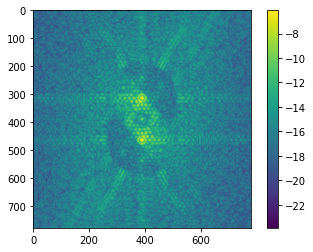

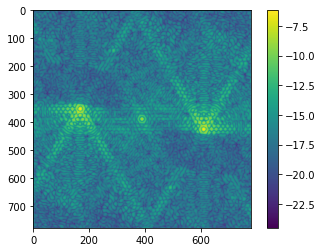

In [3]:
conf = dict(
    dir_output = 'output_files/long_exp/ideal',
    nframes_avg = 1,
    add_phase = False,
)
get_psfs(conf)

### scao only

   2024-12-16 13:43:51, e2e simulation using 12 cores
   2024-12-16 13:43:54, completed in 3.03 seconds
ELT peak = 0.0120
Simulation config: band=L, mode=APPIMG
‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
   npupil=285, pscale=2.7350 mas, lam=3.8112E-06 m
   hfov=1.07 arcsec (-> ndet=779, 50.01 lam/D)

On-axis PSF:
‾‾‾‾‾‾‾‾‾‾‾‾
Load phase screens from 'cube_Cfull_20220512_3600s_300ms_0piston_meters_scao_only_L_285.fits'
   nscreens=1 (nframes=1, nstep=1)
Create on-axis PSF cube
   apply APP stop from 'METIS_IMG_aper_rot.fits'
   apply APP phase from 'METIS_IMG_gvAPP_final_rot.fits'
   2024-12-16 13:43:54, e2e simulation using 12 cores
   2024-12-16 13:43:58, completed in 3.04 seconds
Average PSF cube

On-axis PSF:
‾‾‾‾‾‾‾‾‾‾‾‾
Load phase screens from 'cube_Cfull_20220512_3600s_300ms_0piston_meters_scao_only_L_285.fits'
   nscreens=1 (nframes=1, nstep=1)
Create on-axis PSF cube
   apply APP stop from 'METIS_IMG_aper_rot.fits'
   apply APP phase from 'METIS_IMG_gvAPP_final_rot.fits'
   2024-12-16 13:43:58, e2e s

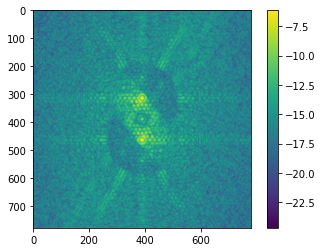

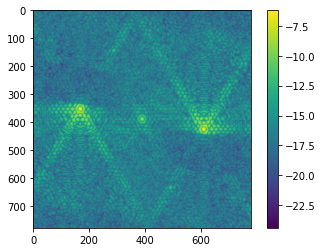

In [4]:
conf = dict(
    dir_output = 'output_files/long_exp/scao_only_1frame',
    nframes_avg = 1,
    add_phase = True,
)
get_psfs(conf)

### long exposure

   2024-12-16 13:44:10, e2e simulation using 12 cores
   2024-12-16 13:45:10, completed in 59.41 seconds
ELT peak = 0.0120
Simulation config: band=L, mode=APPIMG
‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
   npupil=285, pscale=2.7350 mas, lam=3.8112E-06 m
   hfov=1.07 arcsec (-> ndet=779, 50.01 lam/D)

On-axis PSF:
‾‾‾‾‾‾‾‾‾‾‾‾
Load phase screens from 'cube_Cfull_20220512_3600s_300ms_0piston_meters_scao_only_L_285.fits'
   nscreens=100 (nframes=100, nstep=1)
Create on-axis PSF cube
   apply APP stop from 'METIS_IMG_aper_rot.fits'
   apply APP phase from 'METIS_IMG_gvAPP_final_rot.fits'
   2024-12-16 13:45:11, e2e simulation using 12 cores
   2024-12-16 13:46:14, completed in 63.1 seconds
Average PSF cube

On-axis PSF:
‾‾‾‾‾‾‾‾‾‾‾‾
Load phase screens from 'cube_Cfull_20220512_3600s_300ms_0piston_meters_scao_only_L_285.fits'
   nscreens=100 (nframes=100, nstep=1)
Create on-axis PSF cube
   apply APP stop from 'METIS_IMG_aper_rot.fits'
   apply APP phase from 'METIS_IMG_gvAPP_final_rot.fits'
   2024-12-16 13:46:

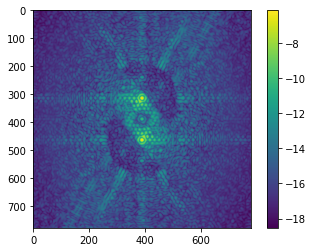

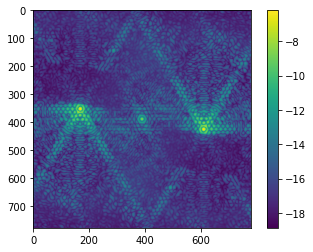

In [5]:
conf = dict(
    dir_output = 'output_files/long_exp/scao_only',
    nframes_avg = 100,
    add_phase = True,
)
get_psfs(conf)

In [6]:
#break

   2024-12-16 13:49:51, e2e simulation using 12 cores
   2024-12-16 13:51:02, completed in 71.72 seconds
ELT peak = 0.0117
Simulation config: band=L, mode=APPIMG
‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
   npupil=285, pscale=2.7350 mas, lam=3.8112E-06 m
   hfov=1.07 arcsec (-> ndet=779, 50.01 lam/D)

On-axis PSF:
‾‾‾‾‾‾‾‾‾‾‾‾
Load phase screens from 'cube_Cfull_20220512_3600s_300ms_0piston_meters_all_ncpa_L_285.fits'
   nscreens=100 (nframes=100, nstep=1)
Load amp screens from 'LM_rep_6_-0h30.fits'
   nscreens=100
Create on-axis PSF cube
   amplitude screen not preloaded: len(amp_screens)=100
   apply APP stop from 'METIS_IMG_aper_rot.fits'
   apply APP phase from 'METIS_IMG_gvAPP_final_rot.fits'
   2024-12-16 13:51:23, e2e simulation using 12 cores
   2024-12-16 13:52:32, completed in 68.5 seconds
Average PSF cube

On-axis PSF:
‾‾‾‾‾‾‾‾‾‾‾‾
Load phase screens from 'cube_Cfull_20220512_3600s_300ms_0piston_meters_all_ncpa_L_285.fits'
   nscreens=100 (nframes=100, nstep=1)
Load amp screens from 'LM_rep_6_-0h3

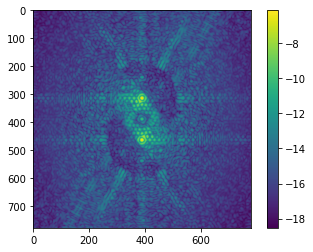

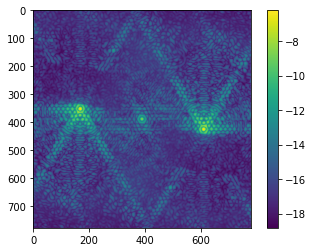

In [7]:
conf = dict(
    dir_output = 'output_files/long_exp/all_effects',
    nframes_avg = 100,
    f_pupil = 'pupil/ELT_fullM1_nov2024_refl_0.10ptv.fits',
    add_phase = True,
    add_apo_drift = True,
    add_amp = True,
    add_cl_vort = True,
)
get_psfs(conf, case='all_ncpa')#, modes=['RAVC'])

   2024-12-16 13:57:25, e2e simulation using 12 cores
   2024-12-16 13:58:36, completed in 71.11 seconds
ELT peak = 0.0116
Simulation config: band=L, mode=APPIMG
‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
   npupil=285, pscale=2.7350 mas, lam=3.8112E-06 m
   hfov=1.07 arcsec (-> ndet=779, 50.01 lam/D)

On-axis PSF:
‾‾‾‾‾‾‾‾‾‾‾‾
Load phase screens from 'cube_Cfull_20220512_3600s_300ms_0piston_meters_all_ncpa_L_285.fits'
   nscreens=100 (nframes=100, nstep=1)
Load amp screens from 'LM_rep_6_-0h30.fits'
   nscreens=100
Create on-axis PSF cube
   amplitude screen not preloaded: len(amp_screens)=100
   apply APP stop from 'METIS_IMG_aper_rot.fits'
   apply APP phase from 'METIS_IMG_gvAPP_final_rot.fits'
   2024-12-16 13:58:55, e2e simulation using 12 cores
   2024-12-16 14:00:05, completed in 70.01 seconds
Average PSF cube

On-axis PSF:
‾‾‾‾‾‾‾‾‾‾‾‾
Load phase screens from 'cube_Cfull_20220512_3600s_300ms_0piston_meters_all_ncpa_L_285.fits'
   nscreens=100 (nframes=100, nstep=1)
Load amp screens from 'LM_rep_6_-0h

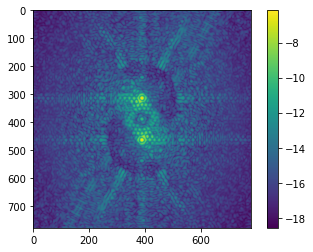

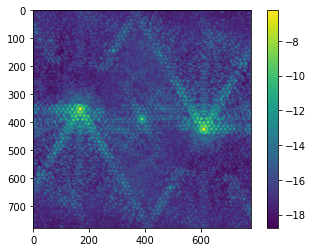

In [8]:
conf = dict(
    dir_output = 'output_files/long_exp/all_effects_misseg',
    nframes_avg = 100,
    f_pupil = 'pupil/ELT_fullM1_nov2024_refl_0.10ptv_misseg_1x7.fits',
    add_phase = True,
    add_apo_drift = True,
    add_amp = True,
    add_cl_vort = True,
)
get_psfs(conf, case='all_ncpa')#, modes=['RAVC'])